# Team Members: Syed Araib Karim, Amanullah Shareef, Shabbab Algamdi, Soumya Bhandari, Divya Geethanjali Birudharaju

# Creating Dataset

In [ ]:

import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
# This the code for scrapping the data by using the beautifulsoup 
import bs4
import requests

#Creating the function to scrap the web page.
def scrapWebPage(url):                  
  response = requests.get(url)

  if response is not None:
    html = bs4.BeautifulSoup(response.text, 'html.parser')

    #title = html.select("#firstHeading")[0].text
    paragraphs = html.select("p")
    articleText = ""
    for para in paragraphs:
        articleText +=  para.text.strip('\n')
        #print (para.text)

    # just grab the text up to contents as stated in question
    #intro = '\n'.join([ para.text for para in paragraphs[0:5]])
    #print (intro)
    return articleText



In [ ]:
#Links to extract the data from the articles and websites
alllinks = []
alllinks.append(scrapWebPage("https://en.wikipedia.org/wiki/Self-driving_car"))
alllinks.append(scrapWebPage("https://www.pnas.org/content/116/16/7684"))
alllinks.append(scrapWebPage("https://searchenterpriseai.techtarget.com/definition/driverless-car"))

alllinks.append(scrapWebPage("https://searchenterpriseai.techtarget.com/definition/driverless-car"))
alllinks.append(scrapWebPage("https://www.synopsys.com/automotive/what-is-autonomous-car.html"))
alllinks.append(scrapWebPage("https://www.which.co.uk/reviews/new-and-used-cars/article/driverless-cars-what-are-autonomous-vehicles-atNd01y1VaMn"))


In [ ]:
#converting the text data into csv file
import csv  
def savingToDataframe(alllinks):
  rows = []
  fields = ["File_Name","Content","Category","Complete_Filename"]
  for i in range(0, len(alllinks)):
    Content = alllinks[i]
    filename = "FileName_"+ str(i)
    category = "tech"
    Complete_Filename = filename
    rows.append([filename, Content,category, Complete_Filename])
  df = pd.DataFrame(rows, columns=fields)
  print(df)
  return df

df = savingToDataframe(alllinks)  

    File_Name  ... Complete_Filename
0  FileName_0  ...        FileName_0
1  FileName_1  ...        FileName_1
2  FileName_2  ...        FileName_2
3  FileName_3  ...        FileName_3
4  FileName_4  ...        FileName_4
5  FileName_5  ...        FileName_5

[6 rows x 4 columns]


In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0
1,FileName_1,Advanced Search See allHide authors and affili...,tech,FileName_1
2,FileName_2,A self-driving car (sometimes called an autono...,tech,FileName_2
3,FileName_3,A self-driving car (sometimes called an autono...,tech,FileName_3
4,FileName_4,An autonomous car is a vehicle capable of sens...,tech,FileName_4


In [ ]:
df.to_csv('dataset_file.csv', index=False)

In [ ]:
#!unzip bbc_text.zip

In [ ]:
#Assigning the column name to the dataset
import pandas as pd
fields = ["File_Name","Content","Category","Complete_Filename"]

df = pd.read_csv('dataset_file.csv', names=fields,header=0)
print(df)

    File_Name  ... Complete_Filename
0  FileName_0  ...        FileName_0
1  FileName_1  ...        FileName_1
2  FileName_2  ...        FileName_2
3  FileName_3  ...        FileName_3
4  FileName_4  ...        FileName_4
5  FileName_5  ...        FileName_5

[6 rows x 4 columns]


In [ ]:
df.head(6)

,File_Name,Content,Category,Complete_Filename
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0
1,FileName_1,Advanced Search See allHide authors and affili...,tech,FileName_1
2,FileName_2,A self-driving car (sometimes called an autono...,tech,FileName_2
3,FileName_3,A self-driving car (sometimes called an autono...,tech,FileName_3
4,FileName_4,An autonomous car is a vehicle capable of sens...,tech,FileName_4
5,FileName_5,We use cookies to allow us and selected partne...,tech,FileName_5


In [ ]:
df.tail(10)

,File_Name,Content,Category,Complete_Filename
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0
1,FileName_1,Advanced Search See allHide authors and affili...,tech,FileName_1
2,FileName_2,A self-driving car (sometimes called an autono...,tech,FileName_2
3,FileName_3,A self-driving car (sometimes called an autono...,tech,FileName_3
4,FileName_4,An autonomous car is a vehicle capable of sens...,tech,FileName_4
5,FileName_5,We use cookies to allow us and selected partne...,tech,FileName_5


In [ ]:
pip install vega==1.3

In [ ]:
#Importing libraries for EDA Analysis
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

### Number of articles in each category




In [ ]:
#Creating bar chart from our dataset
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

### % of articles in each category

In [ ]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

### News length by category

In [ ]:
df['News_length'] = df['Content'].str.len()


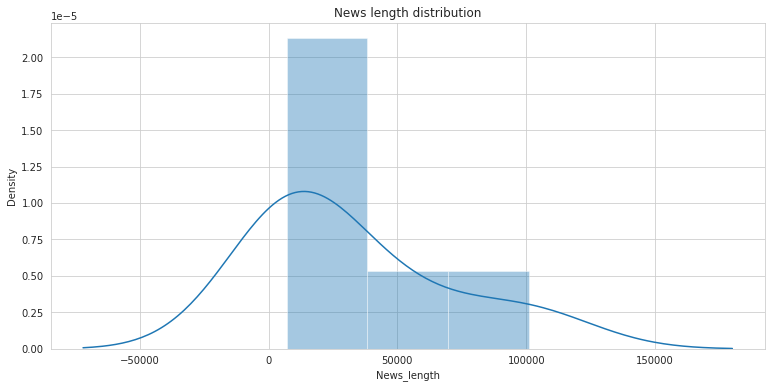

In [ ]:
#displot showing the new length of the article
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [ ]:
#Calculating the statistics of the articles
df['News_length'].describe()

count         6.000000
mean      32779.000000
std       37695.630903
min        7042.000000
25%       11074.000000
50%       12019.000000
75%       43396.000000
max      100980.000000
Name: News_length, dtype: float64

In [ ]:
#Calculating the quantile range for the dataset
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

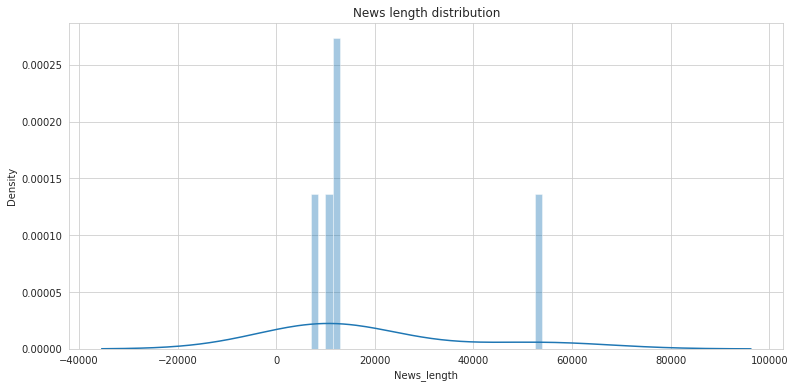

In [ ]:
#Graph plotted density and length of the article
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [ ]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

5

In [ ]:
df_more10k['Content'].iloc[0]

'A self-driving car, also known as an autonomous vehicle (AV or auto), driverless car, or robo-car (robotic car),[1][2][3] is a vehicle that is capable of sensing its environment and moving safely with little or no human input.[4][5]Self-driving cars combine a variety of sensors to perceive their surroundings, such as radar, lidar, sonar, GPS, odometry and inertial measurement units.[1][4] Advanced control systems interpret sensory information to identify appropriate navigation paths, as well as obstacles and relevant signage.[4][6][7][8]Possible implementations of the technology include personal self-driving vehicles, shared robotaxis, connected vehicle platoons and long-distance trucking.[4] Several projects to develop a fully self-driving commercial car are in various stages of development. Waymo became the first service provider to offer robotaxi rides to the general public in a part of Phoenix, Arizona in 2020, while Tesla has said it will offer subscription-based "full self-drivi

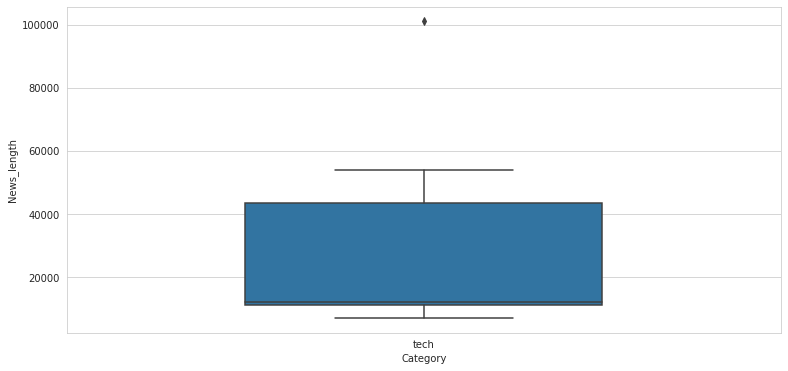

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

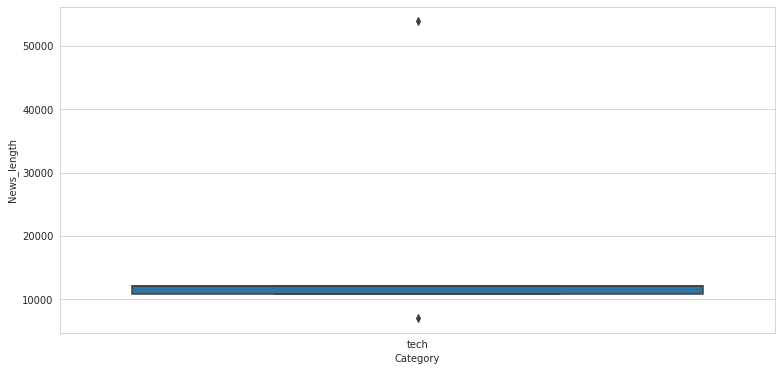

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');


In [ ]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)

In [ ]:

with open('News_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename,id,News_length
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0,1,100980
1,FileName_1,Advanced Search See allHide authors and affili...,tech,FileName_1,1,53855
2,FileName_2,A self-driving car (sometimes called an autono...,tech,FileName_2,1,12019
3,FileName_3,A self-driving car (sometimes called an autono...,tech,FileName_3,1,12019
4,FileName_4,An autonomous car is a vehicle capable of sens...,tech,FileName_4,1,7042


# Feature Engineering


In [ ]:
#
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np
#Loading the dataset
with open('News_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename,id,News_length
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0,1,100980
1,FileName_1,Advanced Search See allHide authors and affili...,tech,FileName_1,1,53855
2,FileName_2,A self-driving car (sometimes called an autono...,tech,FileName_2,1,12019
3,FileName_3,A self-driving car (sometimes called an autono...,tech,FileName_3,1,12019
4,FileName_4,An autonomous car is a vehicle capable of sens...,tech,FileName_4,1,7042


In [ ]:
#visualizing news sample content
df.loc[1]['Content']

'Advanced Search See allHide authors and affiliationsEdited by Baruch Fischhoff, Carnegie Mellon University, Pittsburgh, PA, and approved November 1, 2018 (received for review April 3, 2018)Automated vehicles (AVs) already navigate US highways and those of many other nations around the world. Current questions about AVs do not now revolve around whether such technologies should or should not be implemented; they are already with us. Rather, such questions are more and more focused on how such technologies will impact evolving transportation systems, our social world, and the individuals who live within it and whether such systems ought to be fully automated or remain under some form of direct human control. More importantly, how will mobility itself change as these independent operational vehicles first share and then dominate our roadways? How will the public be kept apprised of their evolving capacities, and what will be the impact of science and the communication of scientific advan

In [ ]:
#Text and Character Cleaning
# \r and \n
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")

In [ ]:
#" when quoting the text"
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')

In [ ]:

# Lowercasing the text
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

In [ ]:
#getting rid of punctuation
punctuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')

In [ ]:
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")

In [ ]:
#Stemming and Lemmatization and 
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [ ]:
df['Content_Parsed_5'] = lemmatized_text_list

In [ ]:

# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [ ]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
df['Content_Parsed_6'] = df['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_6'] = df['Content_Parsed_6'].str.replace(regex_stopword, '')

In [ ]:
#We have some dobule/triple spaces between words because of the replacements. However, it's not a problem because we'll tokenize by the spaces later.

#As an example, we'll show an original news article and its modifications throughout the process:

In [ ]:

df.loc[2]['Content']

'A self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors, cameras, radar and artificial intelligence (AI) to travel between destinations without a human operator. To qualify as fully autonomous, a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its use.Companies developing and/or testing autonomous cars include Audi, BMW, Ford, Google, General Motors, Tesla, Volkswagen and Volvo. Google\'s test involved a fleet of self-driving cars -- including Toyota Prii and an Audi TT -- navigating over 140,000 miles of California streets and highways.AI technologies power self-driving car systems. Developers of self-driving cars use vast amounts of data from\xa0image recognition\xa0systems, along with\xa0machine learning\xa0and\xa0neural networks, to build systems that can drive autonomously.The neural networks identify patterns in the data, which is

In [ ]:
df.loc[2]['Content_Parsed_1']

"A self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors, cameras, radar and artificial intelligence (AI) to travel between destinations without a human operator. To qualify as fully autonomous, a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its use.Companies developing and/or testing autonomous cars include Audi, BMW, Ford, Google, General Motors, Tesla, Volkswagen and Volvo. Google's test involved a fleet of self-driving cars -- including Toyota Prii and an Audi TT -- navigating over 140,000 miles of California streets and highways.AI technologies power self-driving car systems. Developers of self-driving cars use vast amounts of data from\xa0image recognition\xa0systems, along with\xa0machine learning\xa0and\xa0neural networks, to build systems that can drive autonomously.The neural networks identify patterns in the data, which is 

In [ ]:
df.loc[2]['Content_Parsed_2']

"a self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors, cameras, radar and artificial intelligence (ai) to travel between destinations without a human operator. to qualify as fully autonomous, a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its use.companies developing and/or testing autonomous cars include audi, bmw, ford, google, general motors, tesla, volkswagen and volvo. google's test involved a fleet of self-driving cars -- including toyota prii and an audi tt -- navigating over 140,000 miles of california streets and highways.ai technologies power self-driving car systems. developers of self-driving cars use vast amounts of data from\xa0image recognition\xa0systems, along with\xa0machine learning\xa0and\xa0neural networks, to build systems that can drive autonomously.the neural networks identify patterns in the data, which is 

In [ ]:
df.loc[2]['Content_Parsed_3']

"a self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors cameras radar and artificial intelligence (ai) to travel between destinations without a human operator to qualify as fully autonomous a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its usecompanies developing and/or testing autonomous cars include audi bmw ford google general motors tesla volkswagen and volvo google's test involved a fleet of self-driving cars -- including toyota prii and an audi tt -- navigating over 140000 miles of california streets and highwaysai technologies power self-driving car systems developers of self-driving cars use vast amounts of data from\xa0image recognition\xa0systems along with\xa0machine learning\xa0and\xa0neural networks to build systems that can drive autonomouslythe neural networks identify patterns in the data which is fed to the machine 

In [ ]:
df.loc[2]['Content_Parsed_4']

"a self-driving car (sometimes called an autonomous car or driverless car) is a vehicle that uses a combination of sensors cameras radar and artificial intelligence (ai) to travel between destinations without a human operator to qualify as fully autonomous a vehicle must be able to navigate without human intervention to a predetermined destination over roads that have not been adapted for its usecompanies developing and/or testing autonomous cars include audi bmw ford google general motors tesla volkswagen and volvo google test involved a fleet of self-driving cars -- including toyota prii and an audi tt -- navigating over 140000 miles of california streets and highwaysai technologies power self-driving car systems developers of self-driving cars use vast amounts of data from\xa0image recognition\xa0systems along with\xa0machine learning\xa0and\xa0neural networks to build systems that can drive autonomouslythe neural networks identify patterns in the data which is fed to the machine le

In [ ]:
df.loc[2]['Content_Parsed_5']

"a self-driving car (sometimes call an autonomous car or driverless car) be a vehicle that use a combination of sensors cameras radar and artificial intelligence (ai) to travel between destinations without a human operator to qualify as fully autonomous a vehicle must be able to navigate without human intervention to a predetermine destination over roads that have not be adapt for its usecompanies develop and/or test autonomous cars include audi bmw ford google general motor tesla volkswagen and volvo google test involve a fleet of self-driving cars -- include toyota prii and an audi tt -- navigate over 140000 miles of california streets and highwaysai technologies power self-driving car systems developers of self-driving cars use vast amount of data from\xa0image recognition\xa0systems along with\xa0machine learning\xa0and\xa0neural network to build systems that can drive autonomouslythe neural network identify pattern in the data which be feed to the machine learn algorithms that dat

In [ ]:
df.loc[2]['Content_Parsed_6']

" self-driving car (sometimes call  autonomous car  driverless car)   vehicle  use  combination  sensors cameras radar  artificial intelligence (ai)  travel  destinations without  human operator  qualify  fully autonomous  vehicle must  able  navigate without human intervention   predetermine destination  roads     adapt   usecompanies develop / test autonomous cars include audi bmw ford google general motor tesla volkswagen  volvo google test involve  fleet  self-driving cars -- include toyota prii   audi tt -- navigate  140000 miles  california streets  highwaysai technologies power self-driving car systems developers  self-driving cars use vast amount  data \xa0image recognition\xa0systems along \xa0machine learning\xa0\xa0neural network  build systems   drive autonomouslythe neural network identify pattern   data   feed   machine learn algorithms  data include image  cameras  self-driving cars    neural network learn  identify traffic light tree curb pedestrians street sign   part 

In [ ]:
df.head(1)

,File_Name,Content,Category,Complete_Filename,id,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,FileName_0,"A self-driving car, also known as an autonomou...",tech,FileName_0,1,100980,"A self-driving car, also known as an autonomou...","a self-driving car, also known as an autonomou...",a self-driving car also known as an autonomous...,a self-driving car also known as an autonomous...,a self-driving car also know as an autonomous ...,self-driving car also know autonomous vehic...


In [ ]:
list_columns = ["File_Name", "Category", "Complete_Filename", "Content", "Content_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [ ]:

df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed
0,FileName_0,tech,FileName_0,"A self-driving car, also known as an autonomou...",self-driving car also know autonomous vehic...
1,FileName_1,tech,FileName_1,Advanced Search See allHide authors and affili...,advance search see allhide author affiliation...
2,FileName_2,tech,FileName_2,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...
3,FileName_3,tech,FileName_3,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...
4,FileName_4,tech,FileName_4,An autonomous car is a vehicle capable of sens...,autonomous car vehicle capable sense envi...


In [ ]:
# Label coding
#We'll create a dictionary with the label codification:

In [ ]:
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

In [ ]:
# Category mapping
df['Category_Code'] = df['Category']
df = df.replace({'Category_Code':category_codes})

In [ ]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,FileName_0,tech,FileName_0,"A self-driving car, also known as an autonomou...",self-driving car also know autonomous vehic...,4
1,FileName_1,tech,FileName_1,Advanced Search See allHide authors and affili...,advance search see allhide author affiliation...,4
2,FileName_2,tech,FileName_2,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...,4
3,FileName_3,tech,FileName_3,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...,4
4,FileName_4,tech,FileName_4,An autonomous car is a vehicle capable of sens...,autonomous car vehicle capable sense envi...,4


In [ ]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,FileName_0,tech,FileName_0,"A self-driving car, also known as an autonomou...",self-driving car also know autonomous vehic...,4
1,FileName_1,tech,FileName_1,Advanced Search See allHide authors and affili...,advance search see allhide author affiliation...,4
2,FileName_2,tech,FileName_2,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...,4
3,FileName_3,tech,FileName_3,A self-driving car (sometimes called an autono...,self-driving car (sometimes call autonomous ...,4
4,FileName_4,tech,FileName_4,An autonomous car is a vehicle capable of sens...,autonomous car vehicle capable sense envi...,4


In [ ]:
#Train - test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=2)

In [ ]:
X_train.shape
X_test.shape

(1,)

In [ ]:
y_test.shape

(1,)

In [ ]:

# Parameter election
ngram_range = (1,2)
max_df = 10
min_df = 1.
max_features = 300

In [ ]:
'''Text representation
We'll use TF-IDF Vectors as features.'''

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(5, 161)
(1, 161)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. emergency
. error
. even
. lane
. yet
  . Most correlated bigrams:
. driving car
. driving cars

# 'entertainment' category:
  . Most correlated unigrams:
. emergency
. error
. even
. lane
. yet
  . Most correlated bigrams:
. driving car
. driving cars

# 'politics' category:
  . Most correlated unigrams:
. emergency
. error
. even
. lane
. yet
  . Most correlated bigrams:
. driving car
. driving cars

# 'sport' category:
  . Most correlated unigrams:
. emergency
. error
. even
. lane
. yet
  . Most correlated bigrams:
. driving car
. driving cars

# 'tech' category:
  . Most correlated unigrams:
. emergency
. error
. even
. lane
. yet
  . Most correlated bigrams:
. driving car
. driving cars



In [ ]:
bigrams

['self driving',
 'autonomous car',
 'autonomous cars',
 'autonomous vehicles',
 'fully autonomous',
 'human intervention',
 'driverless car',
 'driverless cars',
 'driving car',
 'driving cars']

In [ ]:

# X_train
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

# MODEL training



## Random Forest 

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [ ]:
print(features_train.shape)
print(features_test.shape)

(5, 161)
(1, 161)


In [ ]:
#Cross-Validation for Hyperparameter tuning
#First, we can see what hyperparameters the model has:

In [ ]:
rf_0 = RandomForestClassifier(random_state = 4)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation
We first need to define the grid:

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [ ]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
1.0


### Grid Search Cross Validation


In [ ]:

# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                  

In [ ]:
best_rfc = grid_search.best_estimator_

### Model fit and performance
Now, we can fit the model to our training data:

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = best_rfc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
1.0


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



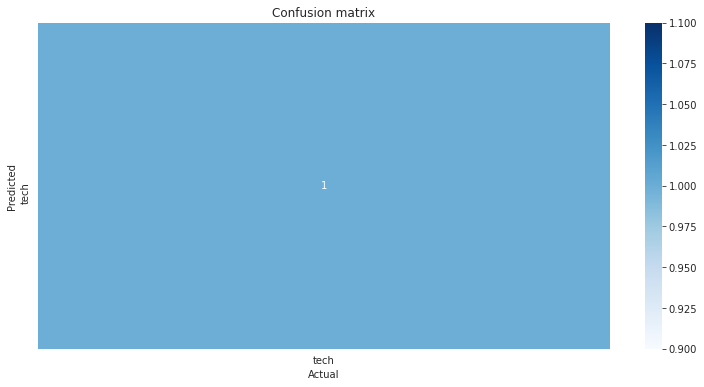

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
features_time = features_train
elapsed_list = []
for i in range(0,10):

    start = time.time()
    predictions = best_rfc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)

### hyperparameter tuning process has returned a better model:

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

1.0

In [ ]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

1.0

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,1.0,1.0


In [ ]:
with open('best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)


## KNN

In [ ]:
#importing all the packages
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Loading the data

In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)


### Check the dimension of our feature vectors:

In [ ]:
print(features_train.shape)
print(features_test.shape)

(5, 161)
(1, 161)


### Cross-Validation for Hyperparameter tuning

In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())


Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Grid Search Cross Validation

In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
print(n_neighbors)
param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

[1, 2, 3]
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
1.0


In [ ]:
n_neighbors = [1,2,3]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
1.0


In [ ]:
best_knnc = grid_search.best_estimator_

In [ ]:

best_knnc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Model fit and performance
we can fit the model to our training data:

In [ ]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:

knnc_pred = best_knnc.predict(features_test)

### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
1.0


### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
1.0


### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



### Confusion matrix

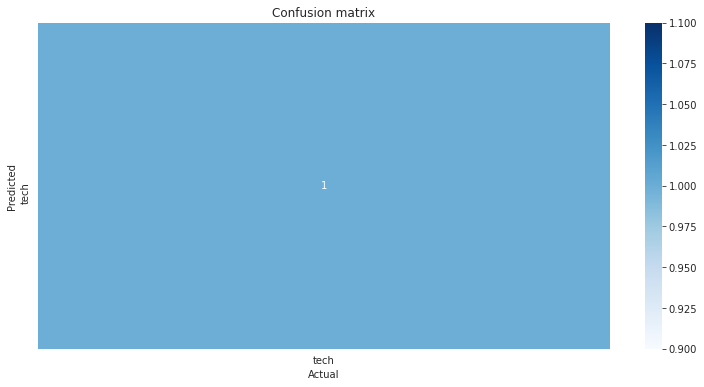

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### Seeing if the hyperparameter tuning process has returned a better model

In [ ]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

1.0

In [ ]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

1.0

In [ ]:

d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,1.0,1.0


### save the model and this dataset:

In [ ]:

with open('best_knnc.pickle', 'wb') as output:
    pickle.dump(best_knnc, output)

with open('df_models_knnc.pickle', 'wb') as output:
    pickle.dump(df_models_knnc, output)

## Multinomial Logistic Regression

In [ ]:
#importing the required packages
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load the data:

In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)


### Check the dimension of feature vectors

In [ ]:
print(features_train.shape)
print(features_test.shape)


(5, 161)
(1, 161)


### Cross-Validation for Hyperparameter tuning

In [ ]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())


Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation
### We first need to define the grid

In [ ]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


### Perform the Random Search

In [ ]:

# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.2s finished


ValueError: ignored

# We tried to perform SVM and Logisitic Regression but unable to complete the training as it requires more than one class.